In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
apt_price = pd.read_csv('apt_price.csv')

In [19]:
apt_price.head()

,지역명,전용면적,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,60,2015,10,5652
2,서울,60~85,2015,10,5882
3,서울,85~102,2015,10,5721
4,서울,102~,2015,10,5879


In [20]:
apt_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     6460 non-null   object
 1   전용면적    6460 non-null   object
 2   연도      6460 non-null   int64 
 3   월       6460 non-null   int64 
 4   분양가격    6460 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 252.5+ KB


In [21]:
# 평당 분양가격
# apt_price['분양가격'] * 3.3
apt_price['평당분양가격'] = apt_price['분양가격'] * 3.3

In [22]:
apt_price

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,60,2015,10,5652,18651.6
2,서울,60~85,2015,10,5882,19410.6
3,서울,85~102,2015,10,5721,18879.3
4,서울,102~,2015,10,5879,19400.7
...,...,...,...,...,...,...
6455,제주,모든면적,2022,1,6574,21694.2
6456,제주,60,2022,1,2862,9444.6
6457,제주,60~85,2022,1,6516,21502.8
6458,제주,85~102,2022,1,5924,19549.2


In [23]:
# [문제] 전용면적별 평당분양가격 평균과 합
g_area = apt_price.groupby('전용면적')
g_area.size()

전용면적
102~      1292
60        1292
60~85     1292
85~102    1292
모든면적      1292
dtype: int64

In [24]:
# for area in g_area:
#     print(f'{area[0]}의 평균 : {area[1].평당분양가격.mean():.2f}')
#     print(f'{area[0]}의 합 : {area[1].평당분양가격.sum():.2f}')

In [25]:
g_area.평당분양가격.mean().round(1)

전용면적
102~      10957.7
60        10467.6
60~85     11019.6
85~102     9603.7
모든면적      11061.8
Name: 평당분양가격, dtype: float64

In [26]:
g_area.평당분양가격.sum()

전용면적
102~      14157323.4
60        13524188.7
60~85     14237358.3
85~102    12407927.4
모든면적      14291844.6
Name: 평당분양가격, dtype: float64

In [27]:
# 집계함수의 결과를 여러 개 사용 가능
# 평당분양가격의 최대값, 최소값
# g_area.평당분양가격.agg(['max', 'min'])
g_area.agg({'평당분양가격' : [max,min]})

평당분양가격     
            max  min
전용면적                
102~    32118.9  0.0
60      34824.9  0.0
60~85   35461.8  0.0
85~102  45655.5  0.0
모든면적    32943.9  0.0

In [28]:
# 평당분양가격의 평균, 분양가격의 평균
g_area.agg({'평당분양가격' : 'mean', '분양가격' : 'mean'})

,평당분양가격,분양가격
전용면적,,
102~,10957.680650,3320.509288
60,10467.638313,3172.011610
60~85,11019.627167,3339.280960
85~102,9603.658978,2910.199690
모든면적,11061.799226,3352.060372


In [29]:
# 평당분양가격의 평균, 평당분양가격의 합
g_area.agg({'평당분양가격' : ['mean', sum]})

평당분양가격            
                mean         sum
전용면적                            
102~    10957.680650  14157323.4
60      10467.638313  13524188.7
60~85   11019.627167  14237358.3
85~102   9603.658978  12407927.4
모든면적    11061.799226  14291844.6

In [30]:
# 평당분양가격의 평균, 평당분양가격의 합
g_area.agg({'평당분양가격' : ['mean', sum]}).columns

MultiIndex([('평당분양가격', 'mean'),
            ('평당분양가격',  'sum')],
           )

In [31]:
g_area.평당분양가격.agg(['mean', sum])

,mean,sum
전용면적,,
102~,10957.680650,14157323.4
60,10467.638313,13524188.7
60~85,11019.627167,14237358.3
85~102,9603.658978,12407927.4
모든면적,11061.799226,14291844.6


In [32]:
g_area.평당분양가격.agg(['mean', sum]).columns

Index(['mean', 'sum'], dtype='object')

In [33]:
g_area.평당분양가격.agg(**{'평당분양가격의 평균' : 'mean', '평당분양가격의 합' : 'sum'})

,평당분양가격의 평균,평당분양가격의 합
전용면적,,
102~,10957.680650,14157323.4
60,10467.638313,13524188.7
60~85,11019.627167,14237358.3
85~102,9603.658978,12407927.4
모든면적,11061.799226,14291844.6


In [34]:
# [문제] 전용면적별 지역별 평당분양가격의 평균
g_area_loc = apt_price.groupby(['전용면적', '지역명'])
g_area_loc.평당분양가격.mean()

전용면적  지역명
102~  강원      9760.748684
      경기     15252.165789
      경남      9504.000000
      경북      9537.260526
      광주     10475.155263
                 ...     
모든면적  전남      7963.247368
      전북      7725.473684
      제주     13529.869737
      충남      8243.052632
      충북      7586.439474
Name: 평당분양가격, Length: 85, dtype: float64

In [35]:
g_area_loc.평당분양가격.mean().unstack().round(2)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102~,9760.75,15252.17,9504.00,9537.26,10475.16,14163.34,5871.74,13510.50,23247.54,9745.59,5761.32,14506.97,9213.17,8564.80,10480.89,8181.66,8503.71
60,8378.74,13544.94,8854.51,8595.46,9711.12,12964.74,9253.46,12190.24,25266.58,6890.31,8239.67,12358.67,7555.09,7916.18,10524.22,8205.93,7499.99
60~85,8116.09,13101.26,9178.12,8678.87,10910.23,12972.82,10316.67,12597.66,24586.82,9158.02,10241.42,12504.13,7964.12,7691.34,13416.98,8261.72,7637.37
85~102,7640.76,14126.34,11392.38,7441.76,4726.08,11171.59,3224.92,12636.92,27792.47,9201.92,3120.98,12942.17,7330.82,8121.13,5819.81,8248.00,8324.16
모든면적,8159.34,13126.14,9217.20,8700.45,11020.57,12961.27,10364.95,12645.77,24584.35,9607.52,10180.80,12434.14,7963.25,7725.47,13529.87,8243.05,7586.44


In [36]:
g_area_loc.평당분양가격.mean().unstack().round(2).T

전용면적,102~,60,60~85,85~102,모든면적
지역명,,,,,
강원,9760.75,8378.74,8116.09,7640.76,8159.34
경기,15252.17,13544.94,13101.26,14126.34,13126.14
경남,9504.00,8854.51,9178.12,11392.38,9217.20
경북,9537.26,8595.46,8678.87,7441.76,8700.45
광주,10475.16,9711.12,10910.23,4726.08,11020.57
대구,14163.34,12964.74,12972.82,11171.59,12961.27
대전,5871.74,9253.46,10316.67,3224.92,10364.95
부산,13510.50,12190.24,12597.66,12636.92,12645.77
서울,23247.54,25266.58,24586.82,27792.47,24584.35


<Axes: xlabel='지역명'>

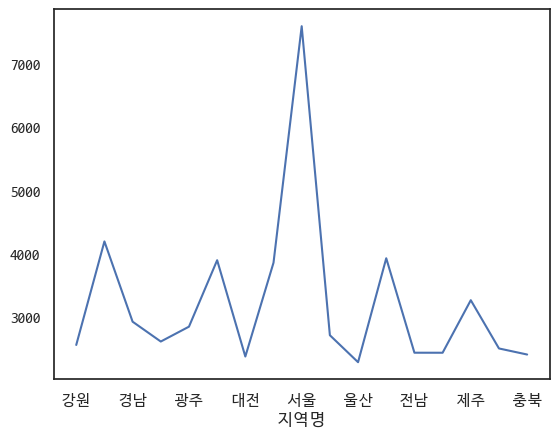

In [71]:
# 지역명별 분양가격의 평균을 시각화
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'D2coding'

apt_price.groupby('지역명').분양가격.mean().plot()

<Axes: xlabel='지역명'>

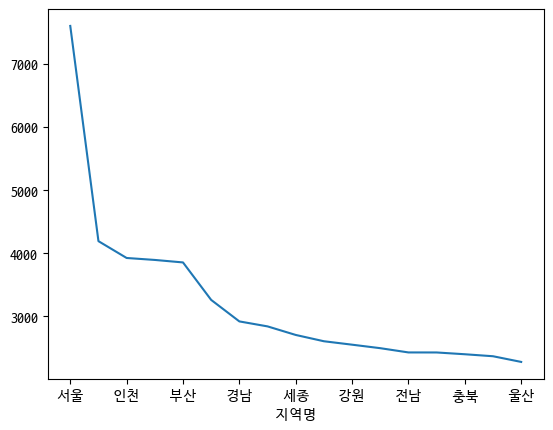

In [38]:
g_local_name = apt_price.groupby('지역명')

# 정렬된 형태의 그래프를 원하면 데이터를 정렬 후 그래프 그림
g_local_name.분양가격.mean().sort_values(ascending=False).plot()

<Axes: xlabel='지역명'>

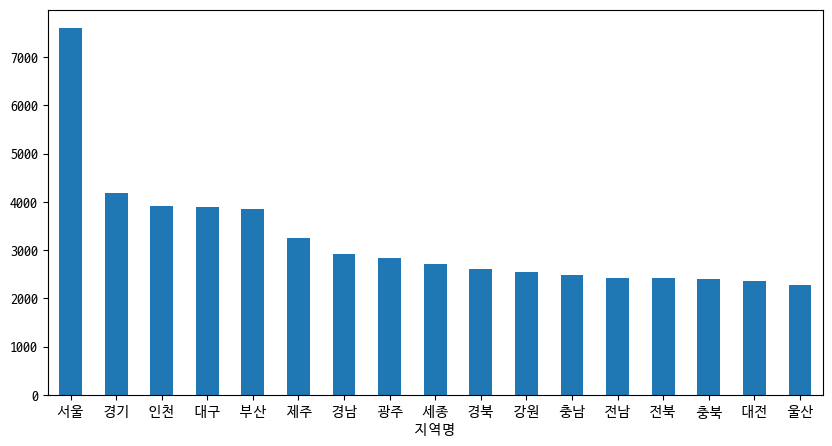

In [39]:
# bar 그래프의 rot 기본값은 90
g_local_name.분양가격.mean().sort_values(ascending=False).plot(
    kind='bar',
    rot=0,
    figsize=(10,5)
)

<Axes: xlabel='전용면적'>

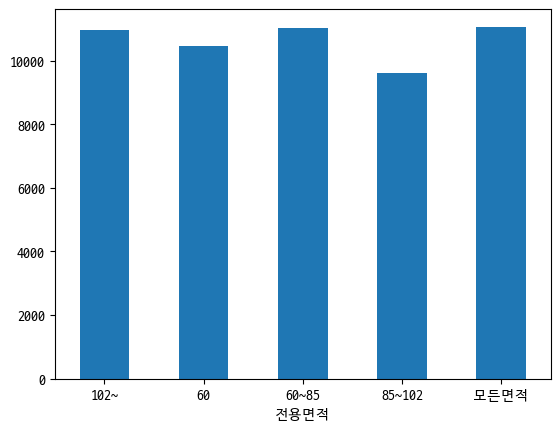

In [40]:
# 전용면적별 평당분양가격의 평균
g_area.평당분양가격.mean().plot(
    kind='bar',
    rot=0,
)

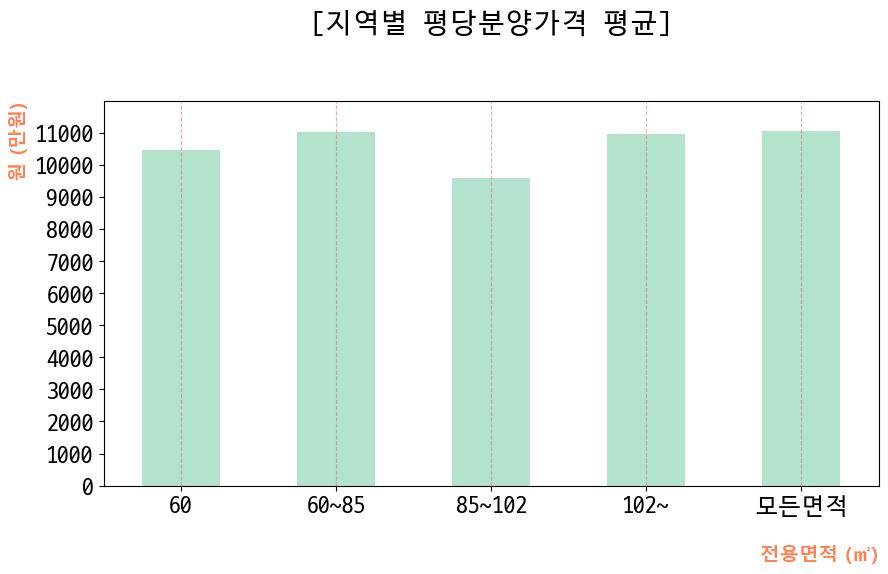

In [41]:
# 정렬이 내림차순 오름차순이 아니라면 필요한 순서대로 추출 후 그래프 그림
# sort_index의 key 매개변수 이용
plt.rc('font', size=15)
plt.rc('axes', titlesize=17)

x_order = ['60', '60~85', '85~102', '102~', '모든면적']
g_area.평당분양가격.mean().loc[x_order].plot(
    kind='bar',
    rot=0,
    ylabel='만원',
#     title='지역별 평당분양가격 평균',
    fontsize=17, # x와 y축의 눈금 폰트 크기 지정
    figsize=(10, 5),
    colormap='Pastel2' # colormap 설정
)

# 타이틀 지정 ==================================================================
# 좀 더 세분화된 타이틀 설정 가능

# plt.title(label,pad,loc,fontsize,fontdict) # 차트의 이름 설정, 
plt.title(
    '[지역별 평당분양가격 평균]',
    pad=50,
    loc='center',
#     fontsize=30
    fontdict={'fontsize' : 20, 'fontweight' : 'bold'}
)

fontdict={
    'family' : 'Malgun Gothic',
    'color' : 'Coral',
    'weight' : 'bold',
    'size' : 14
}

# x축 레이블
plt.xlabel(
    '전용면적 (㎡)',
    labelpad=20,
    loc='right',
    fontdict=fontdict
)

# y축 레이블
plt.ylabel(
    '원 (만원)',
    loc='top',
    fontdict=fontdict
)

# 그리드
plt.grid(
    axis='x',
    color='#e35f62',
    alpha=0.5,
    linestyle='--'
)

# 축범위
# plt.xlim([xmin, xmax])
plt.ylim([0, 12000])
# plt.ylim([-100, 12000]) # 음수가 없이 없는 상태에서 범위를 음수도 포함시키면 그래프가 살짝 뜸

# 눈금
# plt.xticks([0, 1, 2])
# plt.xticks(range(0, 100, 10))
# plt.xticks(np.arange[0, 100, 10])
plt.yticks(range(0, 12000, 1000))

plt.show()

# 가설

## [가설1] 서울과 경기의 연도별 평당분양가 평균은 지속해서 상승했을 것이다.

In [42]:
apt_price.columns

Index(['지역명', '전용면적', '연도', '월', '분양가격', '평당분양가격'], dtype='object')

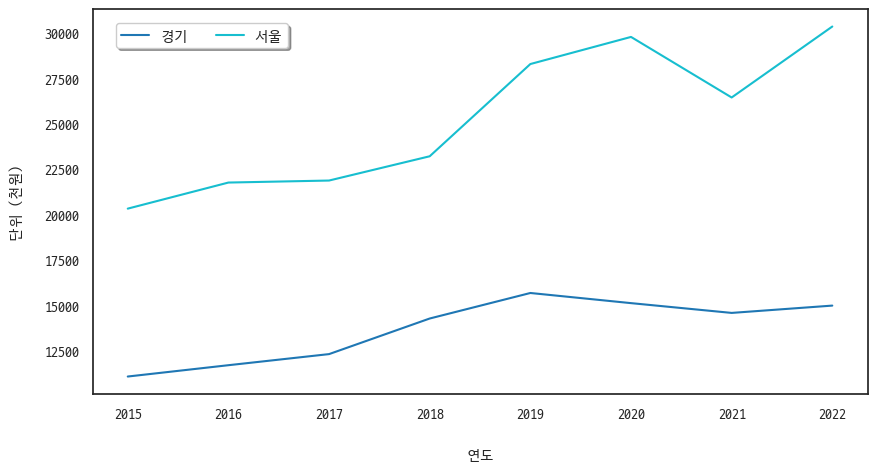

In [111]:
# matplotlib
seoul_kyeonggi = apt_price[(apt_price.지역명=='서울') | (apt_price.지역명=='경기')]
g_year_local = seoul_kyeonggi.groupby(['연도', '지역명'])
g_year_local_mean = g_year_local.평당분양가격.mean().unstack().astype(int)

g_year_local_mean.plot(
    figsize=(10,5),
    colormap="tab10",
    fontsize=10,
)

plt.xlabel(
    '연도',
    labelpad=20,
    fontsize=10
)

plt.ylabel(
    '단위 (천원)',
    labelpad=15,
    fontsize=10
)

plt.legend(
    # 튜플을 통해 범례의 위치를 세밀하게 지정(좌표) 
#     loc=(0.5, 0), # 그래프의 x축 50% 위치에서 범례시작
    fontsize=10,
    loc=(0.03, 0.9),
    ncols=2, # 컬럼의 개수 지정
    shadow=True
)

plt.show()

- seaborn 사용한 시각화
    - matplotlib를 기반으로 한 파이썬 시각화 라이브러리
    - 간결한 문법
    - DataFrame의 데이털르 바로 집계하여 쉽게 시각화 : 그룹화 과정 생략
    - [문법] 
        - data : 데이터 프레임
        - x : x축(컬럼)
        - y : y축(컬럼)
        - hue : 그룹화 기준(컬럼) <br><br>
        
- 오차막대(errorbar)
    - 신뢰구간
    - 부트 스트랩 신뢰구간(Bootstrap confidence interval)
    - 0 ~ 100의 값을 가짐
    - 기본값 95
    - 신뢰구간은 mean(평균), median(중앙값), mode(최빈값) 등을 고려하여 계산
    - 설정 가능한 값 
        - ci : 신뢰구간
        - pi : 백분위구간
        - se : 표준오차
        - sd : 표준편차
        - None <br><br>
- estimator
    - 그래프 그리는 기준 설정
    - numpy라이브러리의 집계함수를 이용
        - np.mean
        - np.max
        - np.min
        - np.median
        - np.sum
        - np.count_nonzero

In [44]:
# seaborn 
# matplotlib 기반이기 때문에 matplotlib가 있어야 함

import seaborn as sns

In [45]:
# apt_price[(apt_price.지역명=='서울') | (apt_price.지역명=='경기')]
local_seoul_kyeonggi = apt_price[apt_price.지역명.isin(['서울', '경기'])] # 서울 또는 경기와 일치하는 지역명 추출
local_seoul_kyeonggi

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,60,2015,10,5652,18651.6
2,서울,60~85,2015,10,5882,19410.6
3,서울,85~102,2015,10,5721,18879.3
4,서울,102~,2015,10,5879,19400.7
...,...,...,...,...,...,...
6385,경기,모든면적,2022,1,4567,15071.1
6386,경기,60,2022,1,4573,15090.9
6387,경기,60~85,2022,1,4646,15331.8
6388,경기,85~102,2022,1,4021,13269.3


In [46]:
# ? : 해당 메소드의 사용법 출력(cmd명령어)
sns.lineplot?

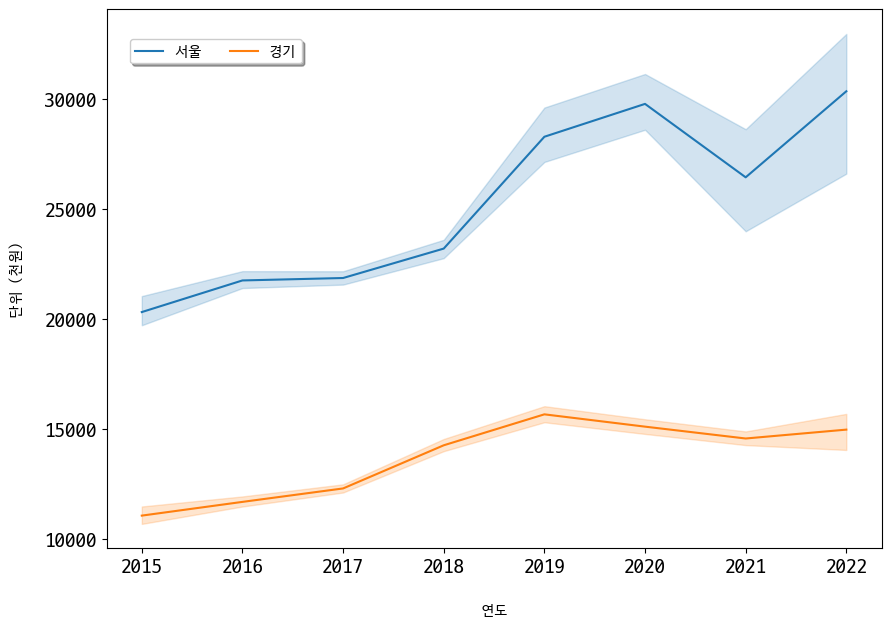

In [47]:
# seaborn의 기본으로 그래프 그리는 방식은 평균
# 선형 그래프
fig = sns.lineplot(
    local_seoul_kyeonggi,
    x='연도', # x축
    y='평당분양가격', # y축
    hue='지역명', # 그룹화
)

plt.xlabel(
    '연도',
    labelpad=20,
    fontsize=10
)

plt.ylabel(
    '단위 (천원)',
    labelpad=15,
    fontsize=10
)

plt.legend(
    # 튜플을 통해 범례의 위치를 세밀하게 지정(좌표) 
#     loc=(0.5, 0), # 그래프의 x축 50% 위치에서 범례시작
    fontsize=10,
    loc=(0.03, 0.9),
    ncols=2, # 컬럼의 개수 지정
    shadow=True
)

fig.figure.set_size_inches(10, 7) 

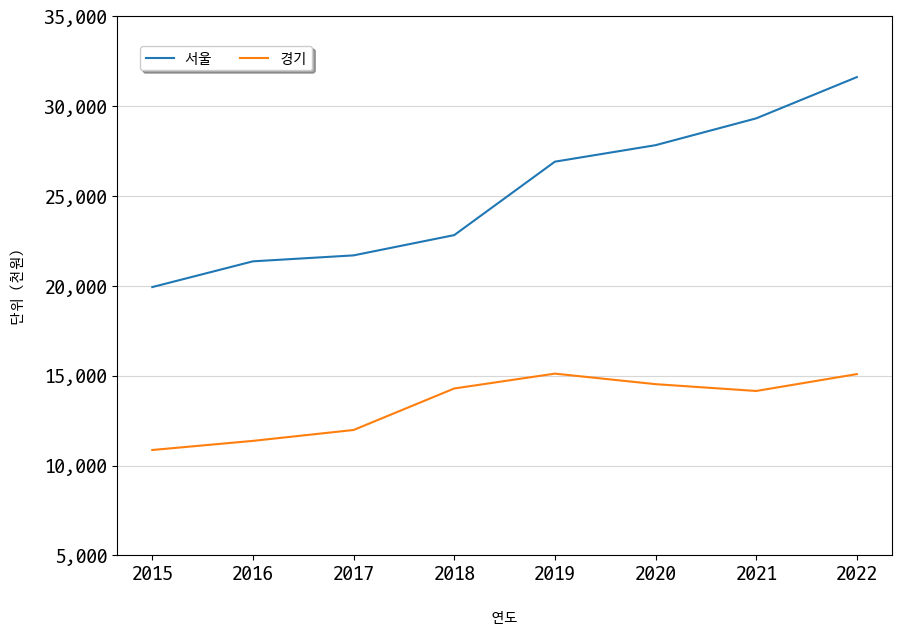

In [48]:
# seaborn의 기본으로 그래프 그리는 방식은 평균
# 선형 그래프
fig = sns.lineplot(
    data=local_seoul_kyeonggi,
    x='연도', # x축
    y='평당분양가격', # y축
    hue='지역명', # 그룹화
    errorbar=None, # 데이터편차 표현X
#     estimator=np.mean # 그래프 그리는 기준(기본값은 평균)
#     estimator=np.sum # 합으로 그래프 그림
#     estimator=np.max # 최대값으로 그래프 그림
    estimator=np.median # 중앙값으로 그래프 그림
)

plt.xlabel(
    '연도',
    labelpad=20,
    fontsize=10
)

plt.ylabel(
    '단위 (천원)',
    labelpad=15,
    fontsize=10
)

plt.legend(
    # 튜플을 통해 범례의 위치를 세밀하게 지정(좌표) 
    # loc=(0.5, 0), # 그래프의 x축 50% 위치에서 범례시작
    fontsize=10,
    loc=(0.03, 0.9),
    ncols=2, # 컬럼의 개수 지정
    shadow=True
)

plt.grid(axis='y', alpha=0.5)

# 천단위 구분기호
yticks = plt.gca().get_yticks()
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels([f'{x:,.0f}' for x in yticks]) # yticks를 다시 설정해줘야 경고 출력 x

fig.figure.set_size_inches(10, 7) 

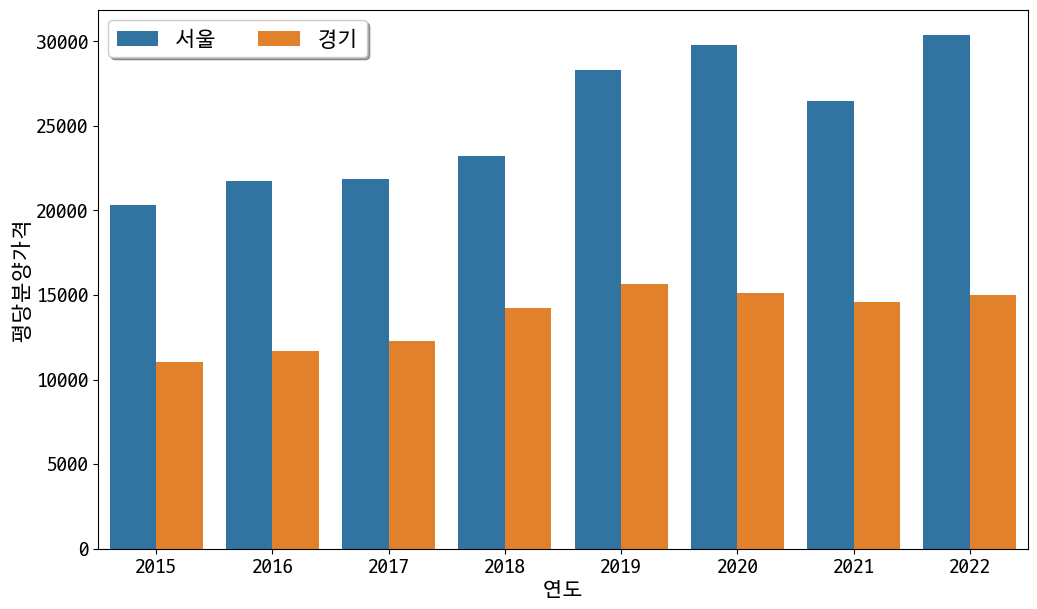

In [49]:
sns.barplot(
    data=local_seoul_kyeonggi,
    x='연도',
    y='평당분양가격',
    hue='지역명',
    errorbar=None
).figure.set_size_inches(12, 7) # 그래프의 크기 조정

plt.legend(ncols=2, shadow=True)
plt.savefig('image.png')

In [50]:
apt_price[apt_price.지역명.isin(['서울', '경기'])].groupby(['지역명','연도']).평당분양가격.mean().unstack()

연도,2015,2016,2017,2018,2019,2020,2021,2022
지역명,,,,,,,,
경기,11060.94,11684.970,12296.185,14258.420,15665.54,15106.080,14567.080,14970.78
서울,20315.68,21753.435,21864.095,23202.245,28286.83,29781.015,26442.405,30354.72


- [가설1] 서울과 경기의 '연도별 평당분양가 평균'은 지속해서 상승했을 것이다.
    - 서울은 '연도별 평당분양가 평균'이 2015년 이후로 상승 추세였으나, 2020년 2,978만원에서 2021년 2,644만원으로 하락했다. 하락된 분양가는 2022년 3,035만원으로 다시 급등하여 사상 최고가를 갱신하였다.
    - 경기 또한 2015년 이후 상승 추세였으나 2019년 1,566만원에서 2020년 1,510만원, 2021년 1,456만원으로 하락했다. 하락된 분양가는 2022년 3,035만원으로 다시 급등하여 사상 최고가를 갱신하였다. 
    <br><br>
    
    - [천 단위 구분기호 생략] - 천 단위 구분기호가 많으면 가독성을 떨어뜨릴 수 있기 때문에 생략하기도 함
    - 서울은 '연도별 평당분양가 평균'이 2015년 이후로 상승 추세였으나, 2020년 2978만원에서 2021년 2644만원으로 하락했다. 하락된 분양가는 2022년 3035만원으로 다시 급등하여 사상 최고가를 갱신하였다.
    - 경기 또한 2015년 이후 상승 추세였으나 2019년 1566만원에서 2020년 1510만원, 2021년 1456만원으로 하락했다. 하락된 분양가는 2022년 1497만원으로 소폭 상승되었다.
    <br><br><br>
    
    - 근거 : 원자제 가격 상승과 인건비 상승이 원인

<img src="image.png" width="500" align=left>
<img src="image2.png" width="650">

In [51]:
# [문제 1] 지역별 평당분양가격의 평균을 시각화
# matplotlib

g_local_mean = apt_price.groupby('지역명').평당분양가격.mean()
g_local_mean

지역명
강원     8411.135526
경기    13830.169737
경남     9629.243684
경북     8590.759737
광주     9368.630526
대구    12846.752368
대전     7806.349737
부산    12716.220000
서울    25095.553421
세종     8920.672895
울산     7508.837368
인천    12949.217368
전남     8005.287632
전북     8003.785263
제주    10754.352632
충남     8228.072368
충북     7910.334474
Name: 평당분양가격, dtype: float64

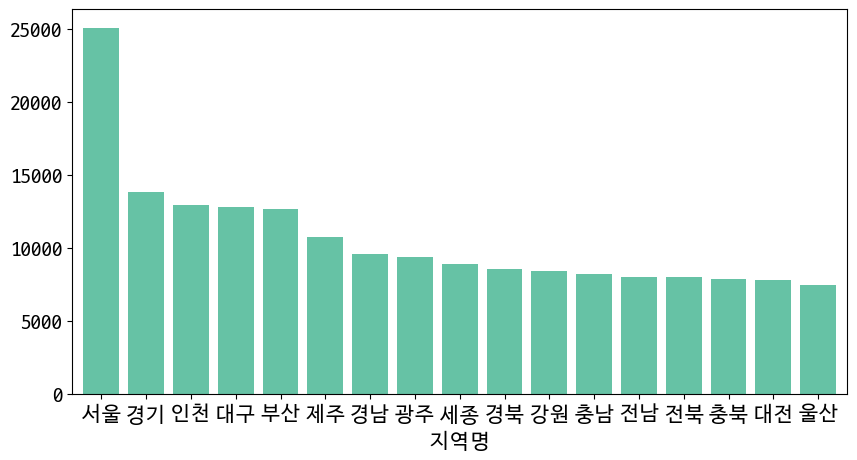

In [52]:
g_local_mean.sort_values(ascending=False).plot(
    kind='bar',
    rot=0,
    width=0.8,
    colormap="Set2"
).figure.set_size_inches(10,5)

plt.show()

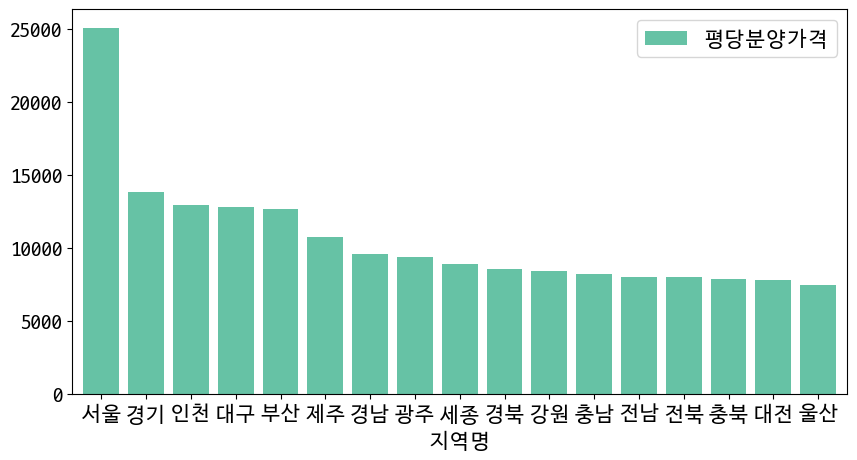

In [53]:
# 데이터 프레임으로 그래프를 그리면 자동으로 범례추가
g_local_mean.sort_values(ascending=False).to_frame().plot(
    kind='bar',
    rot=0,
    width=0.8,
    colormap="Set2"
).figure.set_size_inches(10,5)

plt.show()

In [54]:
g_local_mean.to_frame()

,평당분양가격
지역명,
강원,8411.135526
경기,13830.169737
경남,9629.243684
경북,8590.759737
광주,9368.630526
대구,12846.752368
대전,7806.349737
부산,12716.220000
서울,25095.553421


In [55]:
# apt_price

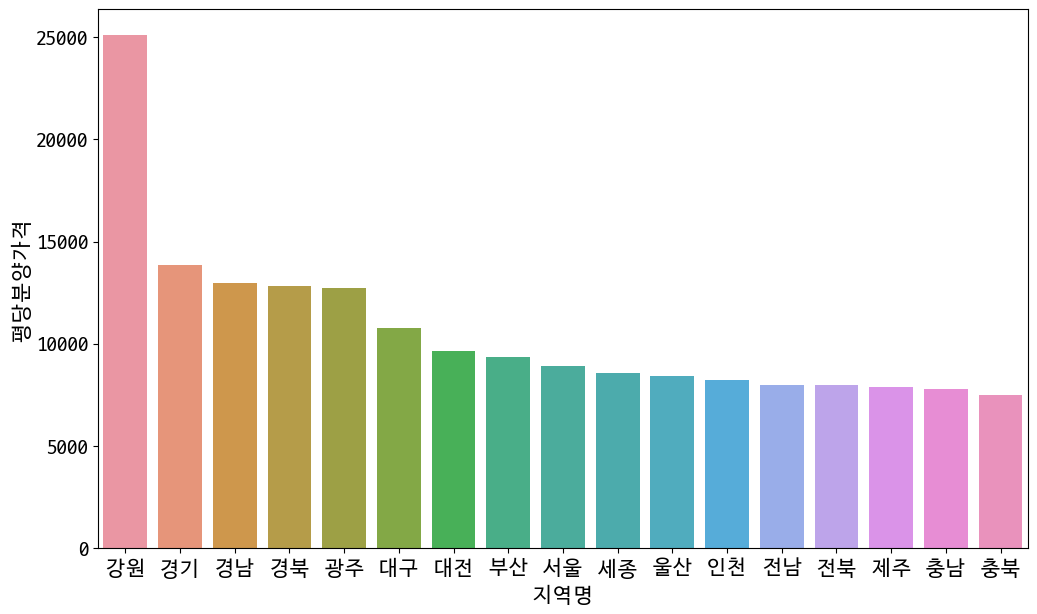

In [56]:
# seaborn
sns.barplot(
    data=g_local_mean.to_frame().sort_values(by='평당분양가격', ascending=False),
    x=g_local_mean.index, # 지역명 다름
    y='평당분양가격',
#     hue='지역명',
    errorbar=None,
).figure.set_size_inches(12, 7)

In [148]:
apt_price[['지역명', '평당분양가격']].sort_values(by='지역명')

,지역명,평당분양가격
3194,강원,8342.4
2511,강원,7487.7
2510,강원,7890.3
3700,강원,8236.8
3701,강원,8325.9
...,...,...
1667,충북,6758.4
1668,충북,8457.9
1669,충북,8461.2
1584,충북,7698.9


In [181]:
help(pd.DataFrame.set_index)

Help on function set_index in module pandas.core.frame:

set_index(self, keys, *, drop: 'bool' = True, append: 'bool' = False, inplace: 'bool' = False, verify_integrity: 'bool' = False) -> 'DataFrame | None'
    Set the DataFrame index using existing columns.
    
    Set the DataFrame index (row labels) using one or more existing
    columns or arrays (of the correct length). The index can replace the
    existing index or expand on it.
    
    Parameters
    ----------
    keys : label or array-like or list of labels/arrays
        This parameter can be either a single column key, a single array of
        the same length as the calling DataFrame, or a list containing an
        arbitrary combination of column keys and arrays. Here, "array"
        encompasses :class:`Series`, :class:`Index`, ``np.ndarray``, and
        instances of :class:`~collections.abc.Iterator`.
    drop : bool, default True
        Delete columns to be used as the new index.
    append : bool, default False
 

In [183]:
apt_price[['지역명', '평당분양가격']].set_index('지역명')

,평당분양가격
지역명,
서울,19275.3
서울,18651.6
서울,19410.6
서울,18879.3
서울,19400.7
...,...
제주,21694.2
제주,9444.6
제주,21502.8


In [230]:
apt_price[['지역명', '평당분양가격']].reset_index(drop=True)

,지역명,평당분양가격
0,서울,19275.3
1,서울,18651.6
2,서울,19410.6
3,서울,18879.3
4,서울,19400.7
...,...,...
6455,제주,21694.2
6456,제주,9444.6
6457,제주,21502.8
6458,제주,19549.2


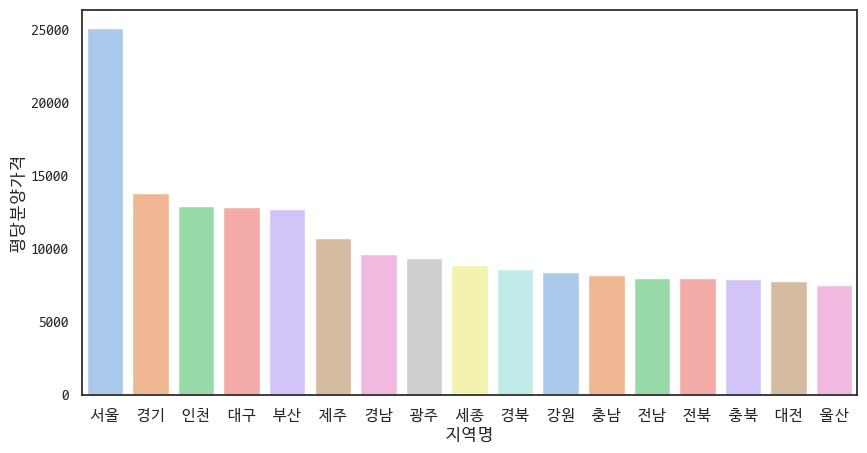

In [228]:
fig = sns.barplot(
    data=apt_price,
    x='지역명',
    y='평당분양가격',
    errorbar=None,
    width=0.8, # 기본값 0.8
    palette='pastel', # colormap 차이점
    order=apt_price.groupby('지역명').평당분양가격.mean().sort_values(ascending=False).index
)
fig.figure.set_size_inches(10,5)

In [58]:
# [문제 2] 연도별 평당분양가격의 평균
g_year_mean = apt_price.groupby('연도').평당분양가격.mean()
g_year_mean

연도
2015     8769.665882
2016     9341.271176
2017     9915.299706
2018     9891.808235
2019    10897.767941
2020    11275.265294
2021    12633.373824
2022    13511.714118
Name: 평당분양가격, dtype: float64

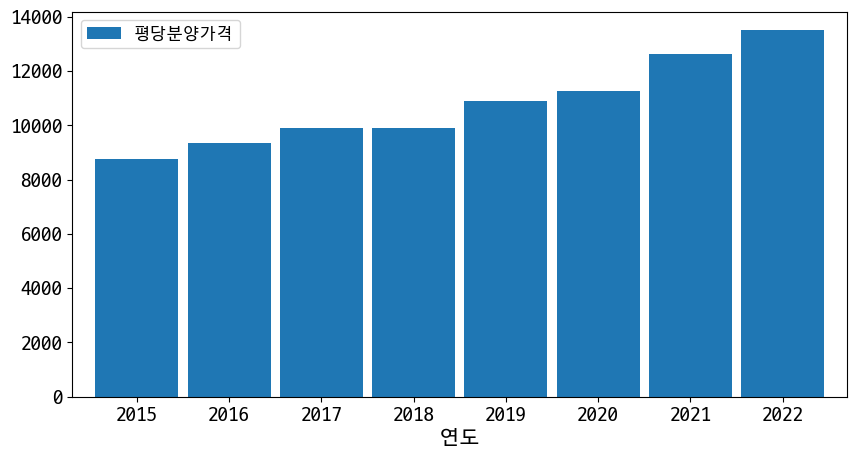

In [59]:
g_year_mean.plot(
    kind='bar',
    rot=0,
    width=0.9,
).figure.set_size_inches(10,5)

plt.legend(
    fontsize=12
)

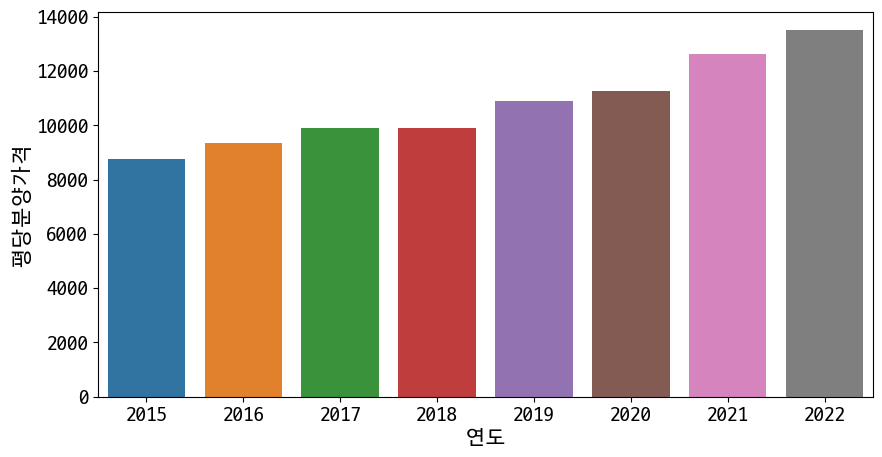

In [60]:
sns.barplot(
    data=apt_price,
    x='연도',
    y='평당분양가격',
    errorbar=None,
).figure.set_size_inches(10, 5)

## [가설 2] 코로나 펜데믹 기간(2020 ~ 2022)에 서울과 경기의 평당분양가 상승률이 낮았을 것이다.


In [112]:
g_year_local_mean

지역명,경기,서울
연도,,
2015,11060,20315
2016,11684,21753
2017,12296,21864
2018,14258,23202
2019,15665,28286
2020,15106,29781
2021,14567,26442
2022,14970,30354


In [115]:
g_year_local_mean['경기상승률'] = 0
g_year_local_mean['서울상승률'] = 0

In [120]:
g_year_local_mean

지역명,경기,서울,경기상승률,서울상승률
연도,,,,
2015,11060,20315,0,0
2016,11684,21753,0,0
2017,12296,21864,0,0
2018,14258,23202,0,0
2019,15665,28286,0,0
2020,15106,29781,0,0
2021,14567,26442,0,0
2022,14970,30354,0,0


In [ ]:
## 전년 대비 증감률(상승/하락)
# (금년-작년) / 작년 * 100

In [196]:
# for idx in range(1, len(g_year_local_mean)):
#     g_year_local_mean.iloc[idx, 2] = (g_year_local_mean.iloc[idx, 0] - g_year_local_mean.iloc[idx-1, 0]) / g_year_local_mean.iloc[idx-1, 0] * 100
#     g_year_local_mean.iloc[idx, 3] = (g_year_local_mean.iloc[idx, 1] - g_year_local_mean.iloc[idx-1, 1]) / g_year_local_mean.iloc[idx-1, 1] * 100
# g_year_local_mean

s_k = g_year_local_mean[['서울', '경기']].T

for year in s_k.columns[1:]:
   s_k[f'{year-1}-{year}'] = (s_k[year][:2] - s_k[year-1][:2]) / s_k[year-1][:2] * 100


In [197]:
s_k

연도,2015,2016,2017,2018,2019,2020,2021,2022,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
지역명,,,,,,,,,,,,,,,
서울,20315,21753,21864,23202,28286,29781,26442,30354,7.078513,0.510274,6.119649,21.911904,5.285300,-11.211846,14.794645
경기,11060,11684,12296,14258,15665,15106,14567,14970,5.641953,5.237932,15.956409,9.868144,-3.568465,-3.568119,2.766527


In [203]:
s_k.iloc[:, 8:]

연도,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
지역명,,,,,,,
서울,7.078513,0.510274,6.119649,21.911904,5.285300,-11.211846,14.794645
경기,5.641953,5.237932,15.956409,9.868144,-3.568465,-3.568119,2.766527


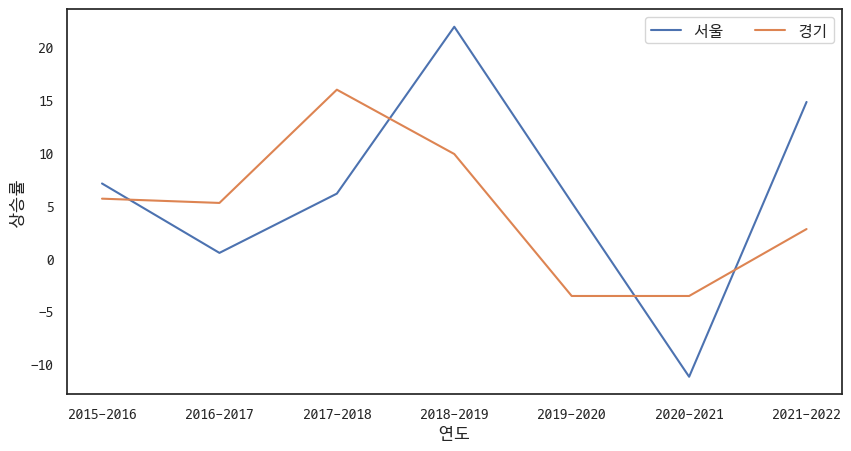

In [209]:
s_k.iloc[:, 8:].T.plot(
).figure.set_size_inches(10, 5)

plt.ylabel(
    ylabel='상승률'
)

plt.legend(
    ncols=2
)

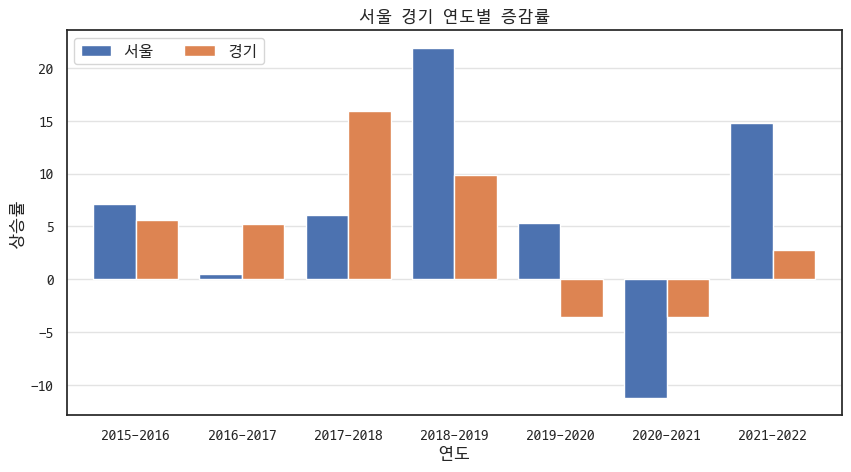

In [223]:
s_k.iloc[:, 8:].T.plot(
    kind='bar',
    rot=0,
    width=0.8,
    title='서울 경기 연도별 증감률',
).figure.set_size_inches(10, 5)

plt.ylabel(
    ylabel='상승률'
)

plt.grid(
    axis='y',
    color='#ddd',
    alpha=0.8
)

plt.legend(
    ncols=2,
    loc=2
)

In [203]:
s_k.iloc[:, 8:]

연도,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
지역명,,,,,,,
서울,7.078513,0.510274,6.119649,21.911904,5.285300,-11.211846,14.794645
경기,5.641953,5.237932,15.956409,9.868144,-3.568465,-3.568119,2.766527


- [가설 2] 코로나 펜데믹 기간(2020 ~ 2022)에 서울과 경기의 평당분양가 상승률이 낮았을 것이다.
    - 코로나 기간 서울의 평당분양가 상승률은 2020년에 5.29%로 과거대비 상대적으로 증가폭이 적고, 2021년은 -11.21%로 전년대비 하락했으나 2022년은 14.79%로 전년대비 큰 폭으로 상승했다
    - 코로나 기간 경기의 평당분양가 상승률은 2020년부터 -3.57%로 전년대비 하락하며 하락세가 2021년까지 -3.57%로 유지됐으나 2022년 전년대비 2.77%로 소폭상승하였다.
<br><br>
- <결론>
    - 2022년 서울의 평당분양가의 평균은 3,035만원, 경기의 평당분양가의 평균은 1,497만원으로 2020년 코로나 시작시기에 서울의 평당분양가의 평균 2,978만원, 경기의 평당분양가의 평균 1,510만원과 서울은 57만원 경기는 -13만원 차이로 서울은 큰 차이가 없고 경기는 하락이 나타났다. 2022년 상승률이 큰 이유는 전년의 증감률이 하락했기 때문에 상대적으로 높은 상승률이 나타나는 것으로 보인다. 결과적으로 코로나시기 평당분양가 상승률은 낮은 것으로 나타난다.

In [224]:
g_year_local_mean[['서울', '경기']]

지역명,서울,경기
연도,,
2015,20315,11060
2016,21753,11684
2017,21864,12296
2018,23202,14258
2019,28286,15665
2020,29781,15106
2021,26442,14567
2022,30354,14970
